In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use('fivethirtyeight')
import datetime
%matplotlib inline

In [2]:
# get the Datas
walmart_path = './datasets/walmart.csv'
data = pd.read_csv(walmart_path)
data.set_index('Date', inplace=True)

In [3]:
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


In [4]:
# Lets take store 1 data for analysis

store1 = data[data.Store == 1]
# there are about 45 different stores in this dataset.

sales1 = pd.DataFrame(store1.Weekly_Sales.groupby(store1.index).sum())
sales1.dtypes
# Grouped weekly sales by store 1

#remove date from index to change its dtype because it clearly isnt acceptable.
sales1.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales1['Date'] = pd.to_datetime(sales1['Date'])
# resetting date back to the index
sales1.set_index('Date',inplace = True)



sales1.head()
# I think its a datetime object now.  

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68


In [5]:
# Lets take store 2 data for analysis
store2 = data[data.Store == 2]
# there are about 45 different stores in this dataset.

sales2 = pd.DataFrame(store2.Weekly_Sales.groupby(store2.index).sum())
sales2.dtypes
# Grouped weekly sales by store 1

#remove date from index to change its dtype because it clearly isnt acceptable.
sales2.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales2['Date'] = pd.to_datetime(sales2['Date'])
# resetting date back to the index
sales2.set_index('Date',inplace = True)

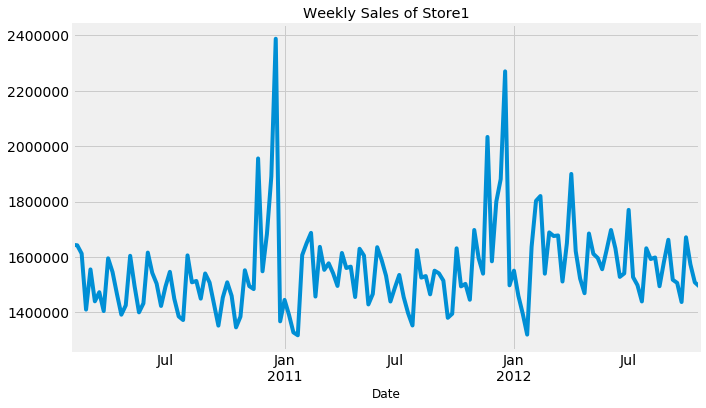

In [6]:
sales1.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of Store1', fontsize=14)
plt.show()

Seems like there is some trends and patterns. Lets look more into the sales data of store 1

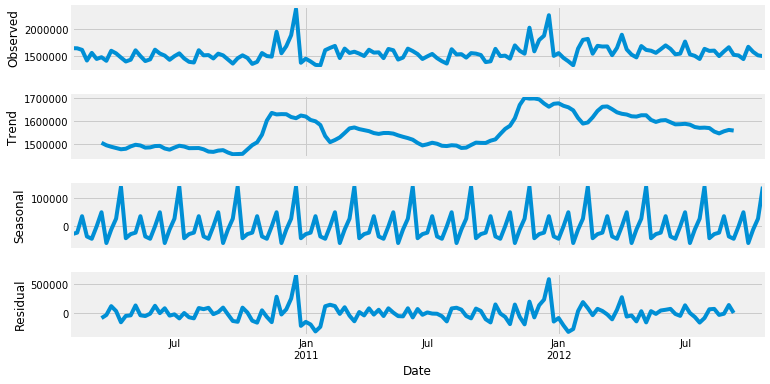

In [11]:
decomposition = seasonal_decompose(sales1.Weekly_Sales, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 6)
plt.show()

In [8]:
y1=sales1.Weekly_Sales
y2=sales2.Weekly_Sales

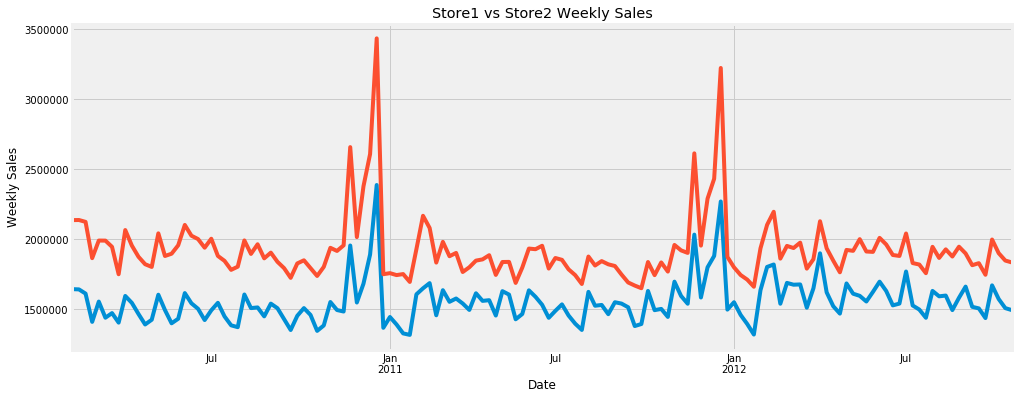

In [10]:
y1.plot(figsize=(15, 6))
y2.plot(figsize=(15, 6))
plt.ylabel('Weekly Sales')
plt.title('Store1 vs Store2 Weekly Sales')
plt.show()

** This clearly shows there are some trends and in the period of November and December there is a spike in sales.
The best thing is both the stores have almost the same trends and spike just the magnitude is different. This clearly tells its a timeseries problem and It would be interesting to look more into it**



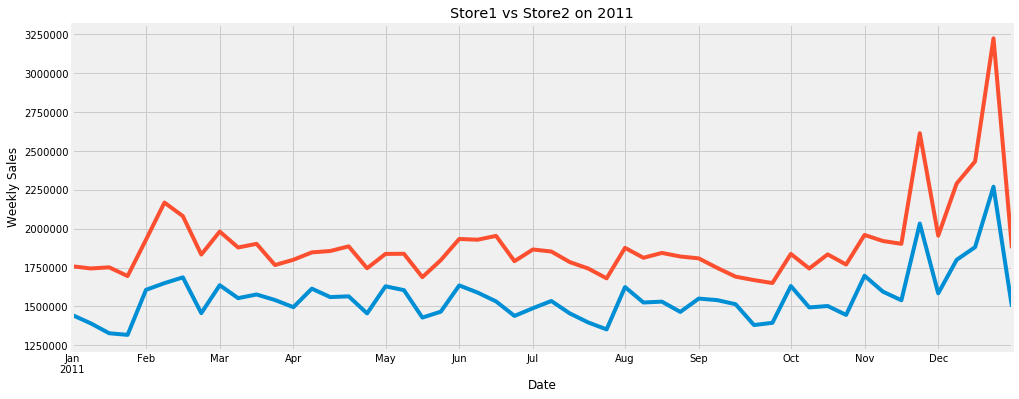

In [12]:
# Lets Look into 2011 data for a better view
y1['2011'].plot(figsize=(15, 6))
y2['2011'].plot(figsize=(15, 6))
plt.ylabel('Weekly Sales')
plt.title('Store1 vs Store2 on 2011')
plt.show()

In [12]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 5)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, d and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 13)
SARIMAX: (0, 0, 1) x (0, 0, 2, 13)
SARIMAX: (0, 0, 2) x (0, 0, 3, 13)
SARIMAX: (0, 0, 2) x (0, 0, 4, 13)


Ran the below code to find automatically which pdq qill be best for my data. Have got the result so commenting it out. If anyone one to replicate the same use the below code and select the pdq that corresponds to the lowest AIC value

In [1]:
# warnings.filterwarnings("ignore") # specify to ignore warning messages

# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(y1,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)

#             results = mod.fit()

#             print('ARIMA{}x{}13 - AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             continue

**ARIMA(3, 4, 4)x(0, 2, 0, 52)52 - AIC:817.5667560557152**

**ARIMA(4, 4, 3)x(1, 1, 0, 52)52 - AIC:817.6215146875342**

These are really close by. I am trying both values and checking how it turns up with both

In [13]:
mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/home/mahendra/anaconda2/envs/python3/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.0926      0.418     -5.009      0.000      -2.911      -1.274
ar.L2         -2.1543      0.553     -3.899      0.000      -3.237      -1.071
ar.L3         -1.5507      0.496     -3.125      0.002      -2.523      -0.578
ar.L4         -0.6020      0.298     -2.020      0.043      -1.186      -0.018
ma.L1         -1.1063      0.467     -2.369      0.018      -2.022      -0.191
ma.L2         -0.7014      0.921     -0.762      0.446      -2.506       1.104
ma.L3          0.8142      0.457      1.782      0.075      -0.081       1.710
ar.S.L52      -0.4278      0.688     -0.622      0.534      -1.776       0.921
sigma2       1.39e+10   3.99e-11   3.49e+20      0.000    1.39e+10    1.39e+10


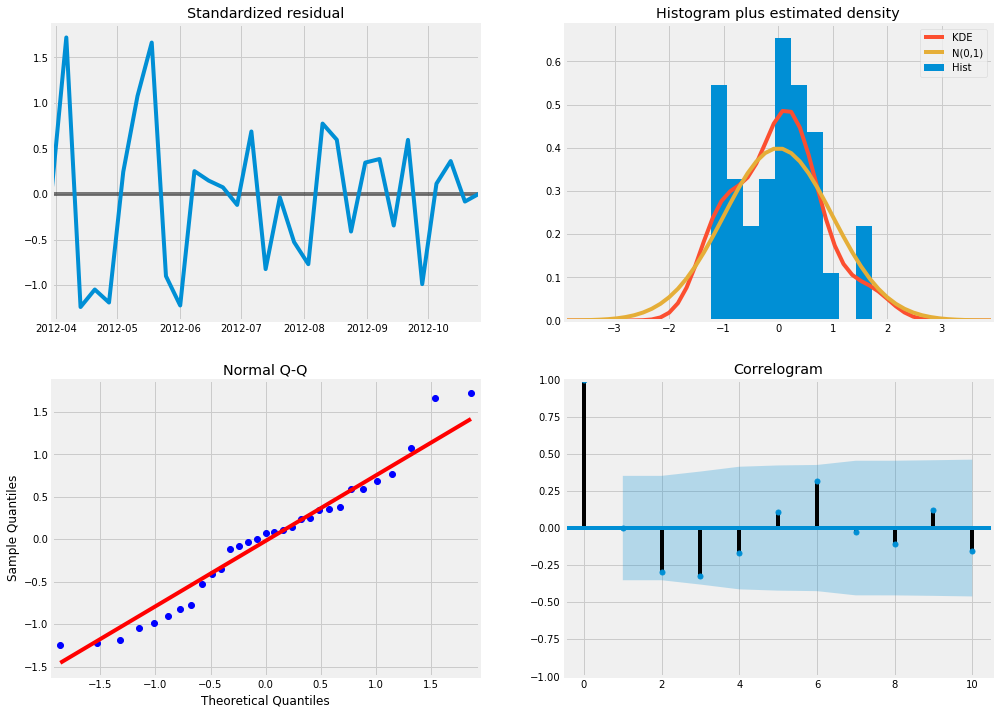

In [14]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [15]:
# Will predict for last 90 days. So setting the date according to that
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

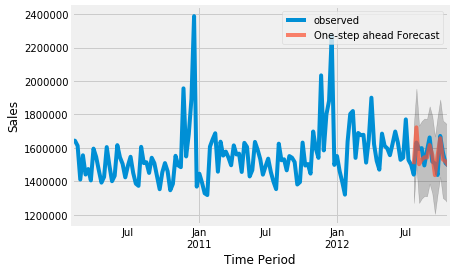

In [16]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [17]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 3852475581.64


In [18]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()


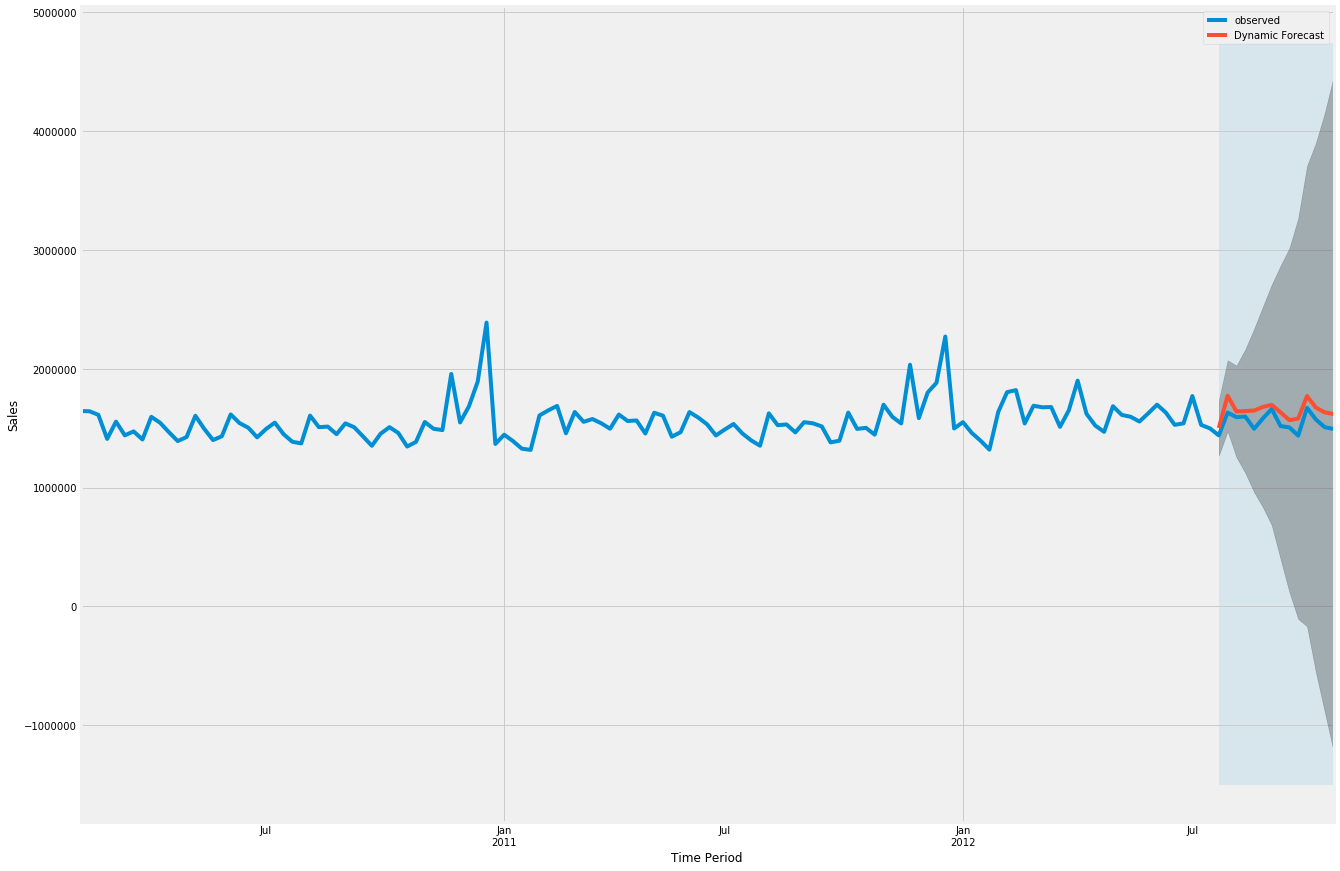

In [19]:
ax = y1['2010':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()


In [20]:

# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean

y_truth = y1['2012-7-27':]

# Compute the Root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))


The Root Mean Squared Error of our forecasts is 103873.46


In [21]:
Residual= y_forecasted - y_truth
print("Residual for Store1",np.abs(Residual).sum())

Residual for Store1 1350823.62599


In [22]:

# Get forecast 12 weeks ahead in future
pred_uc = results.get_forecast(steps=12)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()


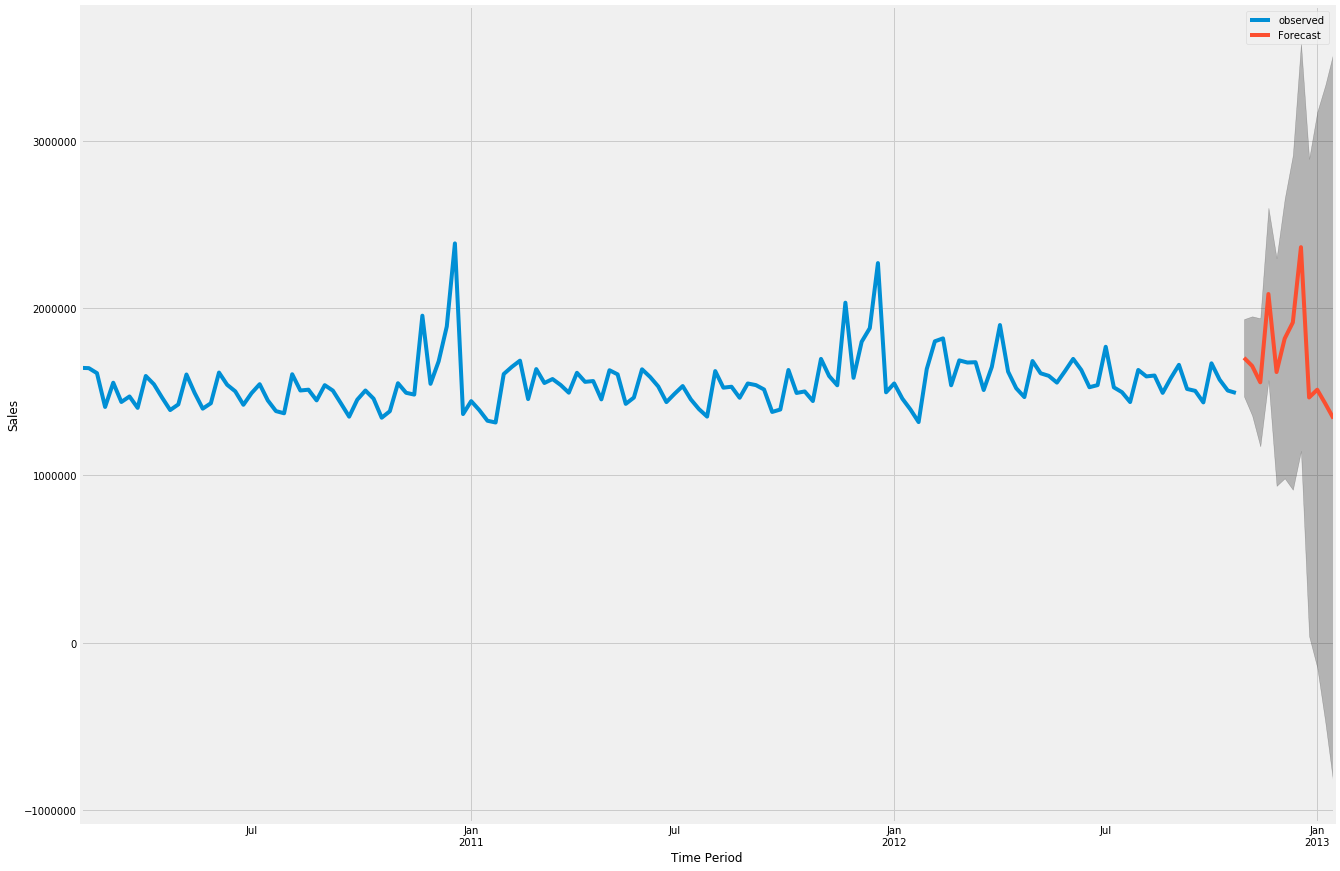

In [23]:

ax = y1.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

For future prediction the model is not that great because the error interval is way big. But if we just check the red line prediction this is almost like earlier years. If we look for may be first 2 weeks the prediction is way better and error is also low. 